In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

In [0]:
pd.set_option('max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
PATH_TO_DATA = './'

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [0]:
train = pd.read_pickle('./train.pkl')
test = pd.read_pickle('./test.pkl')
train.set_index(train['id'], inplace=True)
test.set_index(test['id'], inplace=True)
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)
train.head(2)

,Birth date,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,evalexpr,match_n_match,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Contract termination date,Memory entrance game,Logic entrance game,contract_status,day_00_na,day_01_na,day_02_na,day_03_na,day_04_na,day_05_na,day_06_na,day_07_na,day_08_na,day_09_na,day_10_na,day_11_na,day_12_na,day_13_na,rush_00_na,rush_01_na,rush_02_na,exam_00_na,exam_01_na,exam_02_na,exam_final_na,evalexpr_na,match_n_match_na,bsq_na,age,is_terminate_date,is_female_and_23-28,not_reg_count,not_reg_mean,share_not_reg,not_reg_std,total_score_days,mean_score_days,std_score_days,is_level_greater_4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
129212391,632620800.0,Пермь,male,3,7.463235,google_ads,work,5,0.0,0.0,80.0,0.0,1.0,0.0,15.0,10.0,0.0,50.0,21.0,20.0,55.0,81.0,0.0,0.0,0.0,0.0,0.0,75.0,43.0,100.0,44.0,1,9,11,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1,0.041667,0.041667,0.204124,600.0,25.00,32.362082,1
566688420,838771200.0,Волгоград,female,1,8.785714,not added,not added,0,0.0,10.0,45.0,5.0,1.0,35.0,0.0,5.0,16.0,0.0,9.0,0.0,10.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,16.0,22.0,22.0,1,7,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,1,1,1,0.041667,0.041667,0.204124,306.0,12.75,24.011320,1


In [0]:
cols_to_delete = ['Contract termination date']
train.drop(columns=cols_to_delete, inplace=True)
test.drop(columns=cols_to_delete, inplace=True)

In [0]:
target = train['contract_status']
train.drop(columns=['contract_status'], inplace=True)

In [0]:
la = LabelEncoder()
for col in ['Native city', 'Gender', 'Heard about school from', 'Life status']:
    train[col] = la.fit_transform(train[col])
    test[col] = la.fit_transform(test[col])

# LGBM

In [0]:
import lightgbm as lgbm

[50]	cv_agg's binary_logloss: 0.188599 + 0.0228194<br>
[100]	cv_agg's binary_logloss: 0.164715 + 0.0281321<br>
[150]	cv_agg's binary_logloss: 0.160986 + 0.0313844<br>
[200]	cv_agg's binary_logloss: 0.163081 + 0.0317558<br>
[250]	cv_agg's binary_logloss: 0.167466 + 0.0345043<br>
[300]	cv_agg's binary_logloss: 0.171831 + 0.0381461<br>

In [0]:
params = {'learning_rate':0.019,'max_depth':4,'num_leaves':20,
             'min_data_in_leaf':3, 'application':'binary',
             'subsample':0.8, 'colsample_bytree': 0.8,
             'reg_alpha':0.01,'data_random_seed':2029,'metric':'binary_logloss',
             'max_bin':416,'bagging_freq':3,'reg_lambda':0.01,           
    }
matrix = lgbm.Dataset(train, label=target)
cv_result = lgbm.cv(params, matrix, num_boost_round=5000,nfold=10, stratified=True, 
                    early_stopping_rounds=150, seed=2029, verbose_eval=50,
                    categorical_feature=['Native city', 'Gender', 'Heard about school from',
                                         'Life status', 'Wave id', 'is_terminate_date'])

[50]	cv_agg's binary_logloss: 0.226189 + 0.0203054
[100]	cv_agg's binary_logloss: 0.181912 + 0.0230404
[150]	cv_agg's binary_logloss: 0.166997 + 0.0253916
[200]	cv_agg's binary_logloss: 0.163372 + 0.0262287
[250]	cv_agg's binary_logloss: 0.162205 + 0.0279194
[300]	cv_agg's binary_logloss: 0.163364 + 0.0293554
[350]	cv_agg's binary_logloss: 0.1653 + 0.0311529
[400]	cv_agg's binary_logloss: 0.167747 + 0.0333268


In [0]:
model = lgbm.LGBMClassifier(n_estimators = len(cv_result['binary_logloss-mean']),**params)
model.fit(train,target)

LGBMClassifier(application='binary', bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=0.8, data_random_seed=2029,
               importance_type='split', learning_rate=0.019, max_bin=416,
               max_depth=4, metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=3, min_split_gain=0.0,
               n_estimators=214, n_jobs=-1, num_leaves=20, objective=None,
               random_state=None, reg_alpha=0.01, reg_lambda=0.01, silent=True,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [0]:
pred = model.predict_proba(test)[:,1]
for state in [11, 17, 23, 42, 123, 2017, 2019, 2027, 2503]:
    params.update(data_random_seed=state)
    model = lgbm.LGBMClassifier(n_estimators = len(cv_result['binary_logloss-mean']),**params)
    model.fit(train,target)
    predictions = model.predict_proba(test)
    pred = np.vstack([pred, predictions[:,1]])

In [0]:
mean_pred = pred.mean(axis=0)

In [0]:
pd.DataFrame({'id': test.index, 'contract_status': mean_pred}).\
to_csv('ligbm_mean_state.csv', index=False)

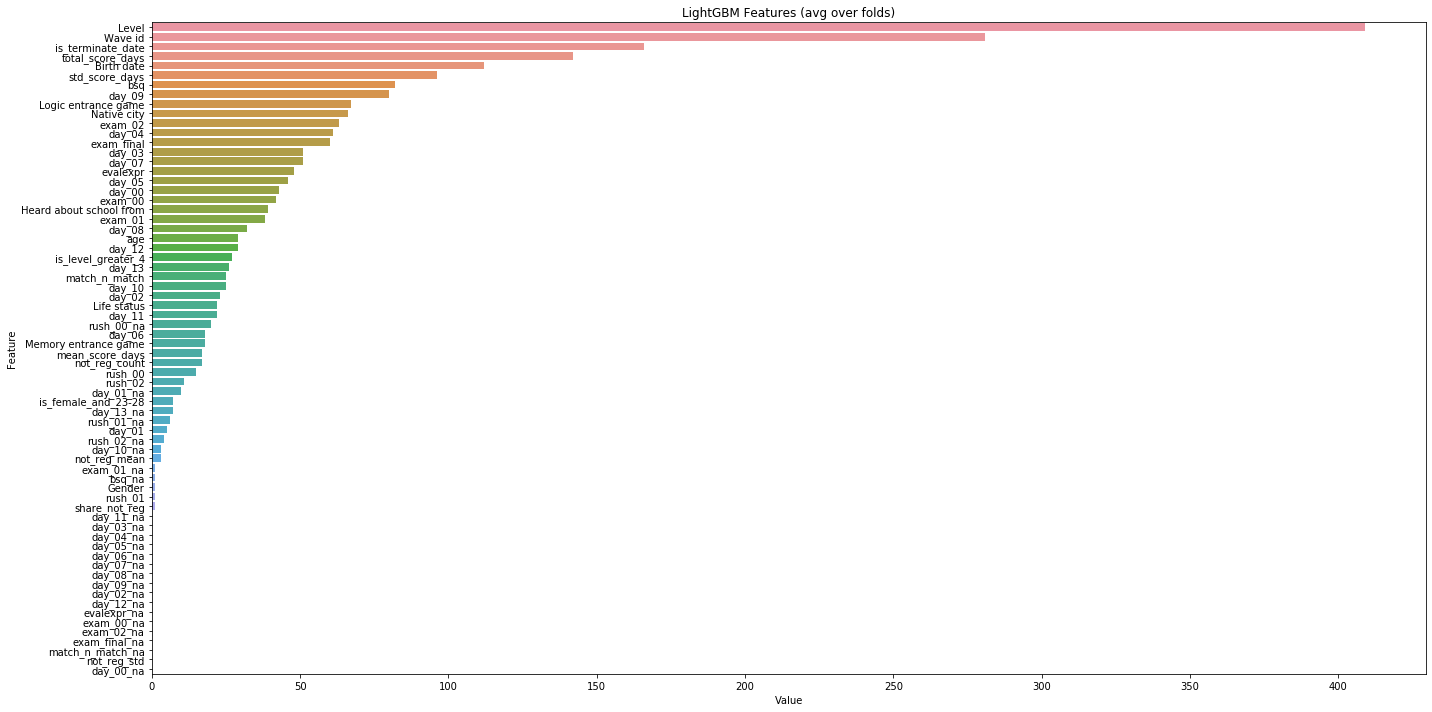

In [0]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [0]:
predictions = model.predict_proba(test)
predictions

array([[0.02764082, 0.97235918],
       [0.22573446, 0.77426554],
       [0.01364455, 0.98635545],
       ...,
       [0.00415702, 0.99584298],
       [0.02355193, 0.97644807],
       [0.73154144, 0.26845856]])

In [0]:
pd.DataFrame({'id': test.index, 'contract_status': predictions[:, 1]}).\
to_csv('ligbm_best_params.csv', index=False)

# Blend

In [0]:
cat_pred = pd.read_csv('./cat_init.csv', index_col=0)
lgbm_pred = pd.read_csv('./ligbm.csv', index_col=0)

In [0]:
alpha = 0.8
new_pred = alpha * lgbm_pred + (1 - alpha) * cat_pred
new_pred.to_csv('./blend.csv')